# SVM Simulation

## Data Preparation

In [1]:
# add required libraries
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [7]:
!pip install -q nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# set random seed to reproduce the same result every time
np.random.seed(500)

In [14]:
# import the corpus
Corpus = pd.read_csv("500_Reddit_users_posts_labels.csv", encoding='latin-1')

## Data Preprocessing

### Tokenization & Word Stemming/Lemmatization

In [16]:
# Step - a : Remove blank rows if any.
Corpus['Post'].dropna(inplace=True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['Post'] = [entry.lower() for entry in Corpus['Post']]

# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['Post']= [word_tokenize(entry) for entry in Corpus['Post']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['Post']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [17]:
!pip install -q tabulate

import pandas as pd
from tabulate import tabulate

# display a few rows of the preprocessed text
print(tabulate(Corpus.head(), headers='keys', tablefmt='psql'))

+----+--------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Split dataset

In [37]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Corpus['text_final'],Corpus['Label'],test_size=0.3, random_state=42)

### Encoding

In [38]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

### Word Vectorization

In [40]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [41]:
# see the vocabulary that it has learned from the corpus
print(Tfidf_vect.vocabulary_)

{'viable': 4762, 'option': 3045, 'youll': 4986, 'leave': 2507, 'wife': 4898, 'behind': 423, 'youd': 4985, 'pain': 3095, 'beyond': 452, 'suck': 4259, 'worry': 4946, 'money': 2830, 'know': 2455, 'first': 1695, 'hand': 1973, 'definitely': 1126, 'feel': 1658, 'hopeless': 2107, 'seem': 3829, 'tire': 4499, 'aware': 339, 'might': 2771, 'need': 2909, 'chip': 728, 'financially': 1687, 'time': 4495, 'issue': 2378, 'even': 1510, 'hour': 2127, 'asthenia': 292, 'could': 953, 'alleviate': 146, 'lot': 2607, 'pressure': 3342, 'meantime': 2712, 'get': 1861, 'shit': 3912, 'together': 4506, 'write': 4962, 'resume': 3667, 'tomorrow': 4512, 'excuse': 1550, 'do': 1280, 'send': 3841, 'whether': 4881, 'believe': 427, 'sort': 4080, 'powerful': 3310, 'force': 1744, 'govern': 1895, 'thing': 4462, 'really': 3532, 'work': 4938, 'big': 456, 'test': 4427, 'pull': 3450, 'try': 4593, 'stay': 4174, 'positive': 3289, 'everything': 1521, 'hard': 1991, 'appreciate': 243, 'notion': 2966, 'meet': 2731, 'someone': 4064, 'els

In [42]:
# vectorized data
print(Train_X_Tfidf)

  (0, 4991)	0.10800931466182243
  (0, 4988)	0.12667772111610137
  (0, 4975)	0.04924426800938957
  (0, 4965)	0.012419158884874217
  (0, 4958)	0.023995873347476535
  (0, 4957)	0.1439752400848592
  (0, 4954)	0.13019428220089982
  (0, 4950)	0.012001034962424714
  (0, 4946)	0.07425103254440905
  (0, 4945)	0.02238907689409131
  (0, 4944)	0.010656266194726061
  (0, 4938)	0.03582550544974401
  (0, 4937)	0.028160798585233394
  (0, 4935)	0.021971167148479572
  (0, 4931)	0.04840318182403305
  (0, 4905)	0.04591988329733795
  (0, 4874)	0.013844885878765815
  (0, 4872)	0.012715599427266414
  (0, 4864)	0.016811276585842073
  (0, 4858)	0.019105553282756815
  (0, 4837)	0.01600628245797449
  (0, 4818)	0.13011452847906466
  (0, 4809)	0.01656017324365014
  (0, 4804)	0.02516305170273311
  (0, 4718)	0.010446643989096423
  :	:
  (349, 218)	0.05460936694014172
  (349, 216)	0.007638524129150748
  (349, 215)	0.01845239763242032
  (349, 205)	0.009671561566252459
  (349, 203)	0.007699303447654728
  (349, 181)	0.0

## Multi-class Classification (One vs Rest)

In [21]:
!pip install -q scikit-learn

In [24]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

In [45]:
# create an instance of the SVM model
svm = LinearSVC(random_state=42)

In [46]:
# make SVM an OvR classifier
ovr_classifier = OneVsRestClassifier(svm)

In [48]:
# fit the data to the OvR classifier
ovr_classifier = ovr_classifier.fit(Train_X_Tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: Futu

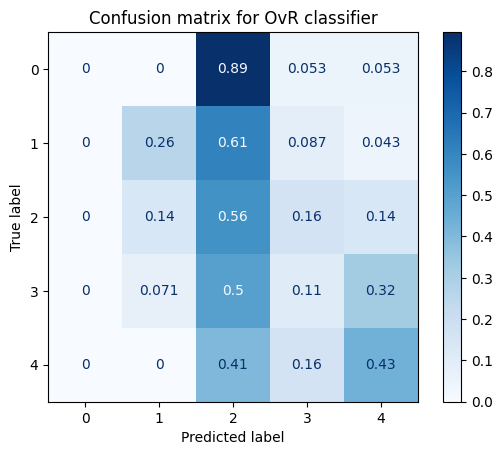

In [55]:
# evaluate by means of a confusion matrix
#ConfusionMatrixDisplay.from_estimator is used here to replace the deprecated plot_confusion_matrix
matrix = ConfusionMatrixDisplay.from_estimator(ovr_classifier, Test_X_Tfidf, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvR classifier')
#plt.show(matrix) removed as matrix.plot() displays the plot
plt.show()